In [1]:
import numpy as np
import matplotlib.pyplot as plt

import py.continuum1d as continuum1d

from py.params import setParams
from py.analysis import computeFPs, checkFixPtsStability, violationType, a_jkValues, lmbd
from py.turings import checkStability

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2 

params=None
c1d = continuum1d.continuum1d()

1d Model initialised.


# Computation of velocity based on finite differences

Let $u_{i,j}$ be the activity at position $i$ and time step $j$. Further, $\Delta t$ is the time step. Then we compute the velocity $v_{i,j}$ at position $i$ at time $j$ with
$\\
v_{i,j} = \frac{x_{i,j+1}-x_{i,j}}{\Delta t}$.

In [43]:
excis = [0.47, 0.50]
inhis = [0.01] 

us = []

for ee in excis:
    for ii in inhis:
        params={'I_e': ee, 'I_i': ii, 'b': 0.25, 'end_t': 25*1000, 'mu_a': 0.4, 'beta_a': 10, 
                'seed': True, 'seed_amp': 0.01}
        
        ps = setParams(params)
        fps = computeFPs(ps)
        stab = checkFixPtsStability(fps, ps)
        
        fp=fps[0]
        
        k=np.linspace(-3,3,51)
        
        vio = checkStability(k, fp, ps)
        print('for I_e=%.2f, I_i=%.2f' %(ee,ii))
        print('fixed points %s ' %str(fps))
        print('with (mass) stability %s'  %str(stab))
        print('and continuum stability of down: %s' %str(vio))
        
        ue, ui = c1d.run(ps, itype='inte_adaptation', fp=fp)
        
        us.append(ue)

for I_e=0.47, I_i=0.01
fixed points [[0.12140373 0.47685033]
 [0.85251023 0.9999334 ]
 [0.97653778 0.99999139]] 
with (mass) stability [1, 0, 1]
and continuum stability of down: (1, 1, 0)
for I_e=0.50, I_i=0.01
fixed points [[0.12927553 0.49212338]
 [0.83434735 0.99991014]
 [0.98115056 0.99999202]] 
with (mass) stability [1, 0, 1]
and continuum stability of down: (1, 1, 0)


In [37]:
def speedBatchesTime(array, batch_size=100):
    batch_number = int(len(array)/batch_size)
    speed_per_batch = np.zeros(batch_number)
    
  #  print('batch number:', batch_number)
  #  print('array:', array)
    
    for i in range(batch_number):
        speed_per_batch[i] = np.abs((array[int(i+batch_size)] - array[i]) / batch_size)
        
  #  print(speed_per_batch)
        
    avg_speed = np.mean(speed_per_batch)
    
    return avg_speed

In [38]:
def speedBatchesSpace(ue, batch_size=100):
    #IMPORTANT: the array ue is already with cut-off transient time!!!
    node_number = ue.shape[-1]
    speed_batches_per_node = np.zeros(node_number)
    
    for i in range(node_number):
        speed_batches_per_node[i] = speedBatchesTime(ue.T[i], batch_size)
        
    print(speed_batches_per_node)
        
    avg_speed = np.mean(speed_batches_per_node)
    
    return avg_speed
        

In [42]:
speedBatchesSpace(us[0][-200000:,:], batch_size=10)

[0.00044545 0.0004477  0.00044814 0.00044826 0.00044827 0.0004482
 0.00044794 0.00044668 0.0004397  0.00041823 0.00040287 0.00039942
 0.00039876 0.00039862 0.00039865 0.00039892 0.00040023 0.00040734
 0.00042892 0.00044417 0.0004475  0.00044811 0.00044825 0.00044829
 0.00044825 0.00044806 0.0004472  0.00044248 0.00042433 0.00040715
 0.00041213 0.00043416 0.00044545 0.0004477  0.00044814 0.00044826
 0.00044827 0.0004482  0.00044794 0.00044668 0.0004397  0.00041823
 0.00040287 0.00039942 0.00039876 0.00039862 0.00039865 0.00039892
 0.00040023 0.00040735 0.00042893 0.00044418 0.00044751 0.00044811
 0.00044825 0.00044829 0.00044825 0.00044806 0.0004472  0.00044248
 0.00042433 0.00040716 0.00041215 0.00043418 0.00044545 0.0004477
 0.00044814 0.00044826 0.00044827 0.0004482  0.00044794 0.00044668
 0.0004397  0.00041823 0.00040287 0.00039942 0.00039876 0.00039862
 0.00039865 0.00039892 0.00040023 0.00040736 0.00042894 0.00044418
 0.00044751 0.00044811 0.00044825 0.00044829 0.00044825 0.000448

0.0004303894405617363

(128, 120001)

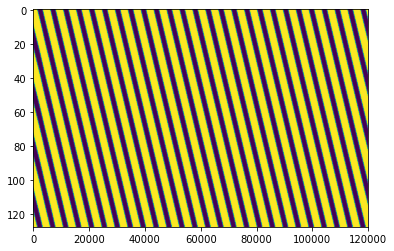

In [35]:
vel_u0 = us[0][int(3*1000*(1/ps.dt)):,:].T
plt.imshow(vel_u0, vmin=0, vmax=1, aspect='auto')
vel_u0.shape

In [ ]:
# Initialize velocity array
velocity = []
num_time_steps = vel_u1.shape[-1]-1
num_positions = vel_u1.shape[0]
positions = vel_u1

# Iterate over positions and time steps
for j in range(num_time_steps - 1):
    # Initialize velocities for this time step
    velocities_at_time_j = []
    
    for i in range(num_positions):
        # Compute velocity using finite differences
        velocity_ij = np.abs((positions[i][j+1] - positions[i][j]) / ps.dt)
        
        # Append the velocity to the list
        velocities_at_time_j.append(velocity_ij)
    
    # Append velocities at time j to the velocity array
    velocity.append(velocities_at_time_j)


In [ ]:
#def nDim_makeBatches(array_of_arrays, batch_size=100):
#    point_number = array_of_arrays.shape[-1]
    

In [15]:
us[0]

array([[0.1229621 , 0.12284762, 0.12255224, ..., 0.12218799, 0.12255224,
        0.12284762],
       [0.12292309, 0.12281473, 0.12253377, ..., 0.12218369, 0.12253377,
        0.12281473],
       [0.12287298, 0.12277039, 0.12250318, ..., 0.12216686, 0.12250318,
        0.12277039],
       ...,
       [0.99726815, 0.99713495, 0.99702705, ..., 0.9951324 , 0.99683036,
        0.99726636],
       [0.9972689 , 0.99713599, 0.99702753, ..., 0.99511144, 0.99682454,
        0.99726537],
       [0.99726964, 0.99713703, 0.99702803, ..., 0.9950903 , 0.99681867,
        0.99726436]])

In [16]:
us[1]

array([[0.13083389, 0.13071942, 0.13042403, ..., 0.13005979, 0.13042403,
        0.13071942],
       [0.13080134, 0.13069268, 0.13041089, ..., 0.13005958, 0.13041089,
        0.13069268],
       [0.13075708, 0.13065391, 0.13038507, ..., 0.13004633, 0.13038507,
        0.13065391],
       ...,
       [0.99634193, 0.99177974, 0.97021824, ..., 0.99769836, 0.99778563,
        0.99752911],
       [0.99635618, 0.99183747, 0.97051808, ..., 0.99769721, 0.99778588,
        0.99753287],
       [0.99637031, 0.99189464, 0.97081455, ..., 0.99769606, 0.99778611,
        0.9975366 ]])

(128, 10001)

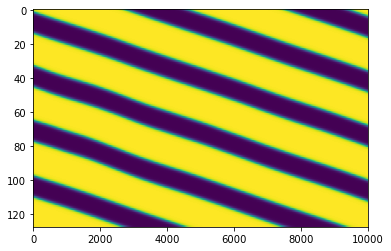

In [33]:
vel_u1 = us[1][int(3*1000*(1/ps.dt)):,:].T
plt.imshow(vel_u1, vmin=0, vmax=1, aspect='auto')
vel_u1.shape

In [50]:
# Initialize velocity array
velocity = []
num_time_steps = vel_u1.shape[-1]-1
num_positions = vel_u1.shape[0]
positions = vel_u1

# Iterate over positions and time steps
for j in range(num_time_steps - 1):
    # Initialize velocities for this time step
    velocities_at_time_j = []
    
    for i in range(num_positions):
        # Compute velocity using finite differences
        velocity_ij = np.abs((positions[i][j+1] - positions[i][j]) / ps.dt)
        
        # Append the velocity to the list
        velocities_at_time_j.append(velocity_ij)
    
    # Append velocities at time j to the velocity array
    velocity.append(velocities_at_time_j)


In [51]:
a = np.abs(velocity[0])
np.mean(a)

0.004066844549918161

In [53]:
a = velocity[0]
np.mean(a)

0.004066844549918161

In [45]:
ps.dt


0.1